In [139]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename_path = 'data/df.csv'
df = pd.read_csv(filename_path)

## Sous-ensemble

In [142]:
influencers_columns = ['NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']
target_columns = ['SiteEnergyUseWN(kBtu)']
df = df[influencers_columns + target_columns]
df.head()
df.shape

(6600, 17)

## Preprocessing

In [143]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(df, test_size=0.2)

In [144]:
def encodage(df):
    return df

In [145]:
def feature_engineering(df):
    return df

In [146]:
def imputation(df):
    df = df.dropna(axis=0)
    return  df

In [147]:
def preprocessing(df):
    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop(target_columns[0], axis=1)
    y = df[target_columns[0]]
    
    return X, y

In [148]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

In [149]:
X_train.head()
X_train.shape

(1737, 16)

## Modélisation

In [150]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

model = KNeighborsRegressor(n_neighbors=5)

In [151]:
def evaluation(model):
    model.fit(X_train, y_train)
    N, train_score, cross_val_score = learning_curve(model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='training score')
    plt.plot(N, cross_val_score.mean(axis=1), label='cross-validation score')
    plt.legend()
    

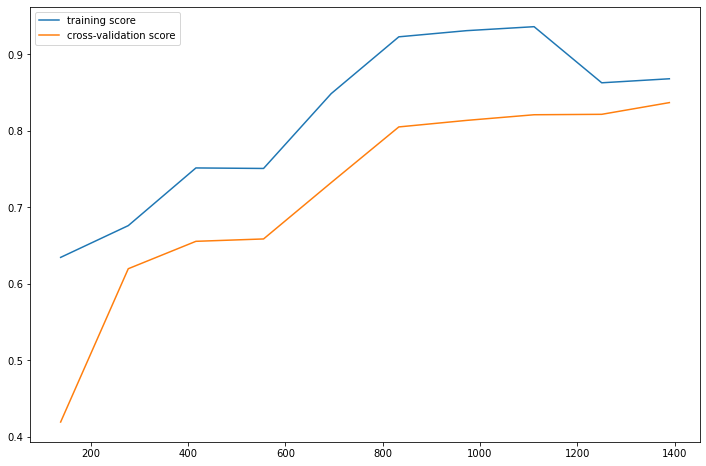

In [152]:
evaluation(model)

In [153]:
model.score(X_train, y_train)

0.8914402813600799

In [154]:
model.score(X_test, y_test)

0.9153149164522558

In [158]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dummy_regr.score(X_test, y_test)

-1.1155917766458856e-05